In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

def getArrays(tree):

    chi2 = np.zeros(tree.GetEntries())
    dm2 = np.zeros(tree.GetEntries())
    sin22th = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        chi2[j] = tree.chi2
        dm2[j] = tree.dm2
        sin22th[j] = tree.sin22th
    
    return chi2, dm2, sin22th

Welcome to JupyROOT 6.18/04


In [2]:
spec1 = np.genfromtxt('../apr28freqtest/hspecnull_sr.txt',delimiter=' ')
a_err1 = spec1[0,:][1:]
a_data1 = spec1[1,:][1:]
a_pred1 = spec1[2,:][1:]
a_chisq1 = spec1[3:,1:]

spec2 = np.genfromtxt('../apr28freqtest/hspecbf_sr.txt',delimiter=' ')
a_err2 = spec2[0,:][1:]
a_data2 = spec2[1,:][1:]
a_pred2 = spec2[2,:][1:]
a_chisq2 = spec2[3:,1:]

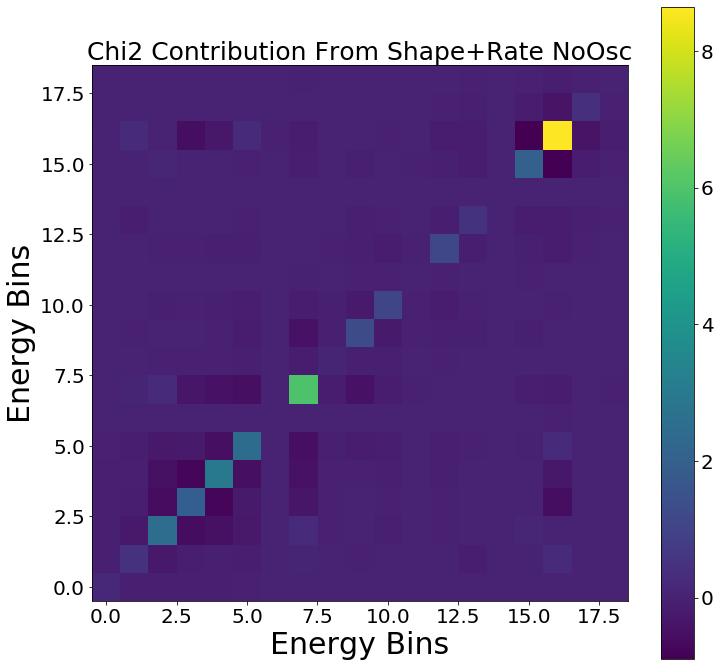

In [37]:
fig,ax = plt.subplots(figsize=(12,12))

plt.imshow(a_chisq2)

plt.gca().invert_yaxis()

ax.set_title('Chi2 Contribution From Shape+Rate NoOsc',fontsize=25)
ax.set_xlabel('Energy Bins',fontsize=30)
ax.set_ylabel('Energy Bins',fontsize=30)

plt.colorbar()

#chisq2.sum()

In [6]:
a_bins = np.asarray((250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200))

chisq1 = a_chisq1.sum()
chisq2 = a_chisq2.sum()

print('noosc',chisq1)
print('bf',chisq2)

chisq1diag = np.divide(np.power(a_pred1-a_data1,2),np.power(a_err1,2)).sum()
chisq2diag = np.divide(np.power(a_pred2-a_data2,2),np.power(a_err2,2)).sum()

print(chisq1diag)
print(chisq2diag)

noosc 14.095492972000002
bf 14.0714815726
5.825898113981778
11.970079336127688


(250, 1200)

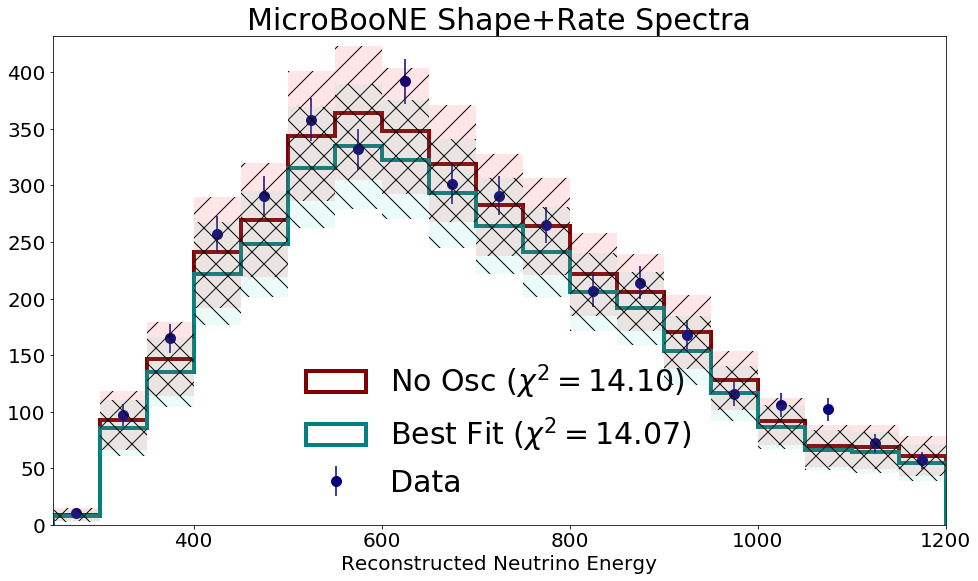

In [7]:
fig, ax = plt.subplots(figsize=(16,9))
bincenters = a_bins[:-1] + np.diff(a_bins)/2


_ = plt.hist(bincenters,bins=a_bins,weights=a_pred1,label=r'No Osc ($\chi^2=$%.2f)'%a_chisq1.sum(),histtype='step',linewidth=4,color='maroon')
_ = plt.hist(bincenters,bins=a_bins,weights=a_pred2,label=r'Best Fit ($\chi^2=$%.2f)'%a_chisq2.sum(),histtype='step',linewidth=4,color='teal')

_ = plt.errorbar(bincenters,a_data1,yerr=np.sqrt(a_data1),markersize=20,fmt='.',label='Data',color='navy')


errboxes_tot1 = []
errboxes_tot2 = []
for i in range(len(bincenters)):
    rect1 = Rectangle((a_bins[i],(a_pred1[i]-a_err1[i])),a_bins[i+1]-a_bins[i],a_err1[i]*2)
    errboxes_tot1.append(rect1)
    rect2 = Rectangle((a_bins[i],(a_pred2[i]-a_err2[i])),a_bins[i+1]-a_bins[i],a_err2[i]*2)
    errboxes_tot2.append(rect2)
pc_tot1 = PatchCollection(errboxes_tot1,facecolor='red',alpha=.1,hatch='/',zorder=12)
pc_tot2 = PatchCollection(errboxes_tot2,facecolor='turquoise',alpha=.1,hatch='\\',zorder=12)
ax.add_collection(pc_tot1)
ax.add_collection(pc_tot2)

ax.legend(fontsize=30,frameon=False,loc='lower center')

ax.set_xlabel('Reconstructed Neutrino Energy',fontsize=20)
ax.set_title('MicroBooNE Shape+Rate Spectra',fontsize=30)
# ax.annotate(r'$\sum$data/$\sum$pred = %.2f'%(a_data.sum()/float(a_pred.sum())),xy=(.01,.92),xycoords='axes fraction',fontsize=20,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
# #plt.annotate('No Osc, Shape+Rate',xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'Diagonal Null $\chi^2$ = %.2f'%chisq1diag,xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'Diagonal BF $\chi^2$ = %.2f'%chisq2diag,xy=(0.2, .12), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f eV^2$'%(sin22th,dm2),xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'$\chi^2=%.2f$'%(chisq),xy=(0.2, .1), xycoords='axes fraction',fontsize=30)




plt.xlim(a_bins[0],a_bins[-1])

In [9]:
f_fd = np.genfromtxt('../data/uboone/fakedatastore_may19.txt')

(250, 1200)

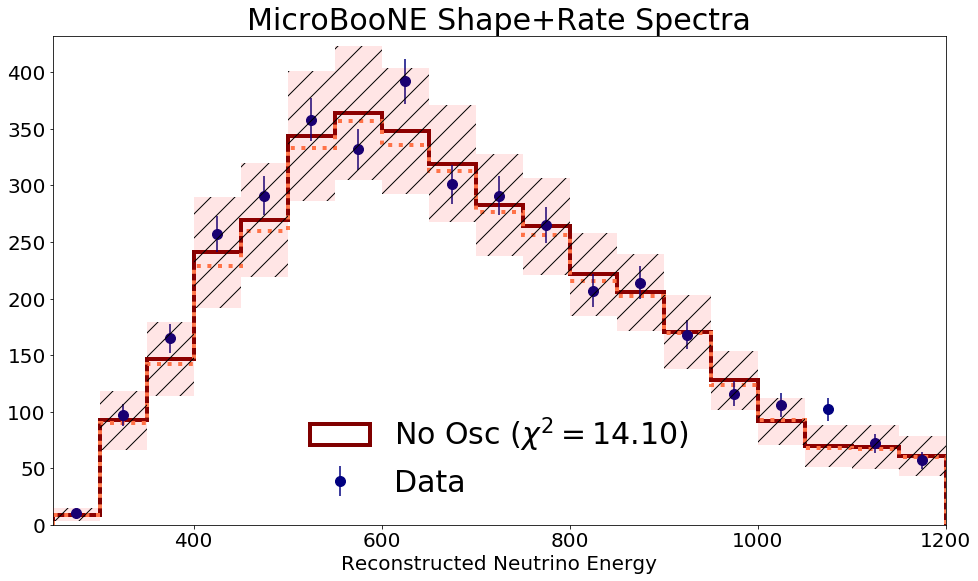

In [13]:
fig, ax = plt.subplots(figsize=(16,9))
bincenters = a_bins[:-1] + np.diff(a_bins)/2


_ = plt.hist(bincenters,bins=a_bins,weights=a_pred1,label=r'No Osc ($\chi^2=$%.2f)'%a_chisq1.sum(),histtype='step',linewidth=4,color='maroon')


_ = plt.hist(bincenters,bins=a_bins,weights=f_fd[0],histtype='step',linewidth=4,color='coral',linestyle=':')


_ = plt.errorbar(bincenters,a_data1,yerr=np.sqrt(a_data1),markersize=20,fmt='.',label='Data',color='navy')


errboxes_tot1 = []
for i in range(len(bincenters)):
    rect1 = Rectangle((a_bins[i],(a_pred1[i]-a_err1[i])),a_bins[i+1]-a_bins[i],a_err1[i]*2)
    errboxes_tot1.append(rect1)
pc_tot1 = PatchCollection(errboxes_tot1,facecolor='red',alpha=.1,hatch='/',zorder=12)
ax.add_collection(pc_tot1)

ax.legend(fontsize=30,frameon=False,loc='lower center')

ax.set_xlabel('Reconstructed Neutrino Energy',fontsize=20)
ax.set_title('MicroBooNE Shape+Rate Spectra',fontsize=30)
# ax.annotate(r'$\sum$data/$\sum$pred = %.2f'%(a_data.sum()/float(a_pred.sum())),xy=(.01,.92),xycoords='axes fraction',fontsize=20,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
# #plt.annotate('No Osc, Shape+Rate',xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'Diagonal Null $\chi^2$ = %.2f'%chisq1diag,xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'Diagonal BF $\chi^2$ = %.2f'%chisq2diag,xy=(0.2, .12), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f eV^2$'%(sin22th,dm2),xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'$\chi^2=%.2f$'%(chisq),xy=(0.2, .1), xycoords='axes fraction',fontsize=30)




plt.xlim(a_bins[0],a_bins[-1])

(250, 1200)

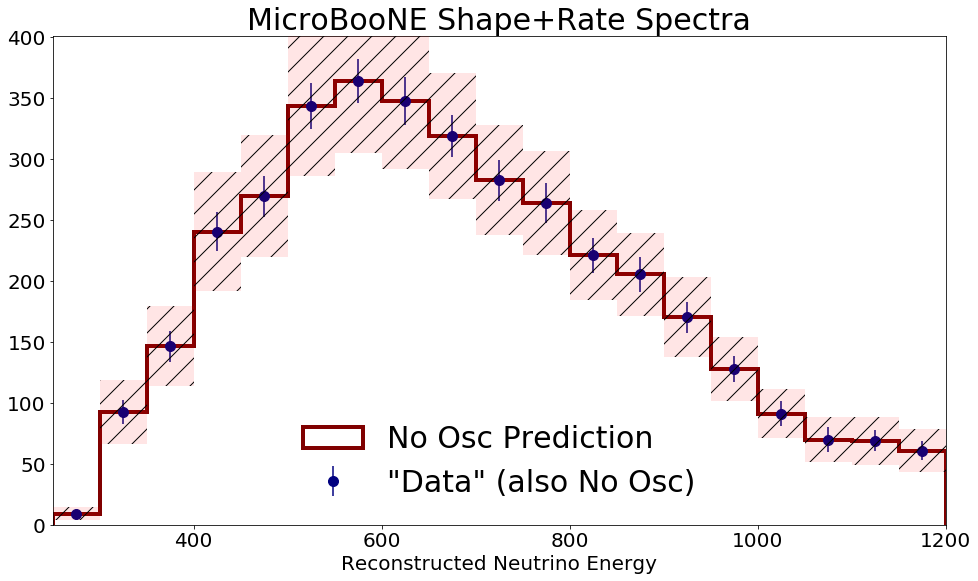

In [44]:
fig, ax = plt.subplots(figsize=(16,9))
bincenters = a_bins[:-1] + np.diff(a_bins)/2


noosc_vals,_,_ = plt.hist(bincenters,bins=a_bins,weights=a_pred1,label=r'No Osc Prediction'%a_chisq1.sum(),histtype='step',linewidth=4,color='maroon')

_ = plt.errorbar(bincenters,noosc_vals,yerr=np.sqrt(a_data1),markersize=20,fmt='.',label='"Data" (also No Osc)',color='navy')


errboxes_tot1 = []
for i in range(len(bincenters)):
    rect1 = Rectangle((a_bins[i],(a_pred1[i]-a_err1[i])),a_bins[i+1]-a_bins[i],a_err1[i]*2)
    errboxes_tot1.append(rect1)
pc_tot1 = PatchCollection(errboxes_tot1,facecolor='red',alpha=.1,hatch='/',zorder=12)
ax.add_collection(pc_tot1)

ax.legend(fontsize=30,frameon=False,loc='lower center')

ax.set_xlabel('Reconstructed Neutrino Energy',fontsize=20)
ax.set_title('MicroBooNE Shape+Rate Spectra',fontsize=30)
# ax.annotate(r'$\sum$data/$\sum$pred = %.2f'%(a_data.sum()/float(a_pred.sum())),xy=(.01,.92),xycoords='axes fraction',fontsize=20,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
# #plt.annotate('No Osc, Shape+Rate',xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'Diagonal Null $\chi^2$ = %.2f'%chisq1diag,xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'Diagonal BF $\chi^2$ = %.2f'%chisq2diag,xy=(0.2, .12), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f eV^2$'%(sin22th,dm2),xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
# plt.annotate(r'$\chi^2=%.2f$'%(chisq),xy=(0.2, .1), xycoords='axes fraction',fontsize=30)




plt.xlim(a_bins[0],a_bins[-1])

In [60]:
spec1 = np.genfromtxt('../apr28freqtest/hspecnull_so.txt',delimiter=' ')
a_err1 = spec1[0,:][1:]
a_data1 = spec1[1,:][1:]
a_pred1 = spec1[2,:][1:]
a_chisq1 = spec1[3:,1:]

spec2 = np.genfromtxt('../apr28freqtest/hspecbf_so.txt',delimiter=' ')
a_err2 = spec2[0,:][1:]
a_data2 = spec2[1,:][1:]
a_pred2 = spec2[2,:][1:]
a_chisq2 = spec2[3:,1:]

In [19]:
a_bins = np.asarray((250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200))

chisq1 = a_chisq1.sum()
chisq2 = a_chisq2.sum()

print('noosc',chisq1)
print('bf',chisq2)

noosc 13.260721948759999
bf 6.8796207343999995


(250, 1200)

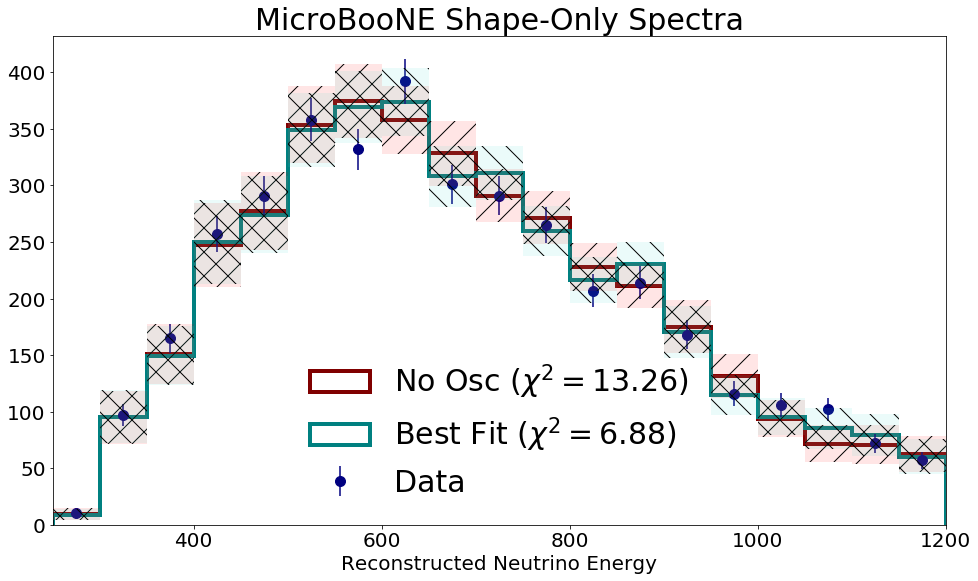

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
bincenters = a_bins[:-1] + np.diff(a_bins)/2


_ = plt.hist(bincenters,bins=a_bins,weights=a_pred1,label=r'No Osc ($\chi^2=$%.2f)'%a_chisq1.sum(),histtype='step',linewidth=4,color='maroon')
_ = plt.hist(bincenters,bins=a_bins,weights=a_pred2,label=r'Best Fit ($\chi^2=$%.2f)'%a_chisq2.sum(),histtype='step',linewidth=4,color='teal')


_ = plt.errorbar(bincenters,a_data1,yerr=np.sqrt(a_data1),markersize=20,fmt='.',label='Data',zorder=10,color='navy')


errboxes_tot1 = []
errboxes_tot2 = []
for i in range(len(bincenters)):
    rect1 = Rectangle((a_bins[i],(a_pred1[i]-a_err1[i])),a_bins[i+1]-a_bins[i],a_err1[i]*2)
    errboxes_tot1.append(rect1)
    rect2 = Rectangle((a_bins[i],(a_pred2[i]-a_err2[i])),a_bins[i+1]-a_bins[i],a_err2[i]*2)
    errboxes_tot2.append(rect2)
pc_tot1 = PatchCollection(errboxes_tot1,facecolor='red',alpha=.1,hatch='/',zorder=12)
pc_tot2 = PatchCollection(errboxes_tot2,facecolor='turquoise',alpha=.1,hatch='\\',zorder=12)
ax.add_collection(pc_tot1)
ax.add_collection(pc_tot2)

ax.legend(fontsize=30,frameon=False,loc='lower center')

ax.set_xlabel('Reconstructed Neutrino Energy',fontsize=20)
ax.set_title('MicroBooNE Shape-Only Spectra',fontsize=30)
#ax.annotate(r'$\sum$data/$\sum$pred = %.2f'%(a_data.sum()/float(a_pred.sum())),xy=(.01,.92),xycoords='axes fraction',fontsize=20,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
#plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f eV^2$'%(sin22th,dm2),xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
#plt.annotate(r'$\chi^2=%.2f$'%(chisq),xy=(0.2, .1), xycoords='axes fraction',fontsize=30)

plt.xlim(a_bins[0],a_bins[-1])

In [4]:
specf = np.genfromtxt('../data/uboone/fakedatastore_may19.txt',delimiter=' ')
spec_fd = specf

a_bins = np.asarray((250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200))
bincenters = a_bins[:-1] + np.diff(a_bins)/2

In [5]:
a_covdiagonal = np.asarray((20.9505, 412.28, 636.424, 1388.63, 1501.53, 2143.35, 2472.65, 2207.96, 2053.72, 1592.65, 1449.49, 1109.13, 1020.51, 959.924, 579.444, 414.665, 301.566, 333.524, 284.926))
print(len(a_covdiagonal))

19


In [6]:
#null case
a_covdiagonal=np.asarray((29.1053, 662.859, 1007.29, 2187, 2342.12, 3127.38, 3409.3, 2901.45, 2613.18, 1952.97, 1743.99, 1295.82, 1164, 1092.17, 643.887, 453.101, 331.317, 362.379, 309.281))
spec_cv = a_pred1

In [7]:
print(np.power(a_err1,2))
print(a_covdiagonal)

[  30.04245721  694.586025   1067.73404644 2406.97190881 2504.101681
 3306.95153721 3522.84983296 3123.27852769 2694.04597764 2030.24138724
 1836.94531216 1352.915524   1173.48723844 1081.58765625  682.85006596
  417.55244281  346.91670049  380.82351609  321.628356  ]
[  29.1053  662.859  1007.29   2187.     2342.12   3127.38   3409.3
 2901.45   2613.18   1952.97   1743.99   1295.82   1164.     1092.17
  643.887   453.101   331.317   362.379   309.281 ]


In [8]:
((np.power(a_err1,2)-a_covdiagonal)/a_covdiagonal).max()

0.10058157695930481

(250, 1200)

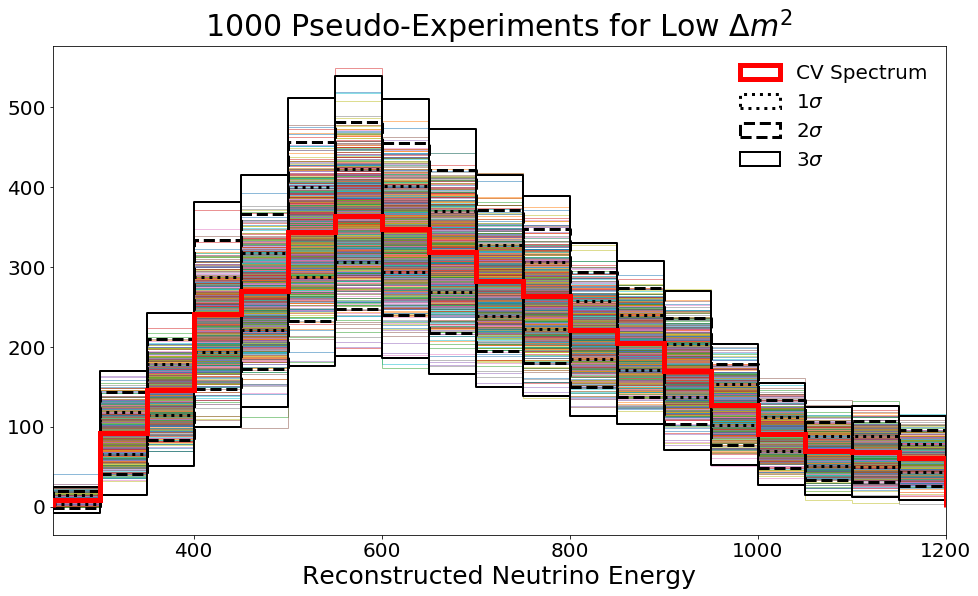

In [13]:
fig, ax = plt.subplots(figsize=(16,9))

for spec in spec_fd:
    _ = plt.hist(bincenters,bins=a_bins,weights=spec,histtype='step',linewidth=1,alpha=.5)

_ = plt.hist(bincenters,bins=a_bins,weights=spec_cv,histtype='step',edgecolor='red',linewidth=5,zorder=20,label='CV Spectrum')


errboxes_tot1 = []
errboxes_tot2 = []
errboxes_tot3 = []
for i in range(len(bincenters)):
    rect1 = Rectangle((a_bins[i],(spec_cv[i]-np.sqrt(a_covdiagonal)[i])),a_bins[i+1]-a_bins[i],np.sqrt(a_covdiagonal)[i]*2)
    errboxes_tot1.append(rect1)
    rect2 = Rectangle((a_bins[i],(spec_cv[i]-2*np.sqrt(a_covdiagonal)[i])),a_bins[i+1]-a_bins[i],np.sqrt(a_covdiagonal)[i]*2*2)
    errboxes_tot2.append(rect2)
    rect3 = Rectangle((a_bins[i],(spec_cv[i]-3*np.sqrt(a_covdiagonal)[i])),a_bins[i+1]-a_bins[i],np.sqrt(a_covdiagonal)[i]*2*3)
    errboxes_tot3.append(rect3)
pc_tot1 = PatchCollection(errboxes_tot1,edgecolor='black',linestyle=':',fc='None',zorder=12,linewidth=3)
pc_tot2 = PatchCollection(errboxes_tot2,edgecolor='black',linestyle='--',fc='None',zorder=12,linewidth=3)
pc_tot3 = PatchCollection(errboxes_tot3,edgecolor='black',hatch='',fc='None',zorder=12,linewidth=2)
                      
ax.add_collection(pc_tot1)
ax.add_collection(pc_tot2)
ax.add_collection(pc_tot3)
                      

plt.hist(bincenters,bins=a_bins+3000,histtype='step',edgecolor='black',linewidth=3,linestyle=':',label=r'$1\sigma$')
plt.hist(bincenters,bins=a_bins+3000,histtype='step',edgecolor='black',linewidth=3,linestyle='--',label=r'$2\sigma$')
plt.hist(bincenters,bins=a_bins+3000,histtype='step',edgecolor='black',linewidth=2,label=r'$3\sigma$')
    
ax.legend(frameon=False,fontsize=20)
ax.set_title(r'1000 Pseudo-Experiments for Low $\Delta m^2$',fontsize=30)
    
ax.set_xlabel('Reconstructed Neutrino Energy',fontsize=25)
ax.set_xlim(a_bins[0],a_bins[-1])